<a href="https://colab.research.google.com/github/TaegeunSONG/knu/blob/main/KmeansPNU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python basics

In [ ]:
# Drive Mount for colab users
from google.colab import drive
drive.mount('/content/drive')



In [ ]:
# file write

f = open("/content/drive/MyDrive/file_name.txt", 'w')

for i in range(1, 11):
    data = '{n} 번째 줄입니다.\n'.format(n=i)
    f.write(data)

f.flush()
f.close()

In [ ]:
# file read

f = open('/content/drive/MyDrive/file_name.txt', 'r')

lines = f.readlines()
# print(lines)

for il, line in enumerate(lines):
    print(il, line)
f.close()

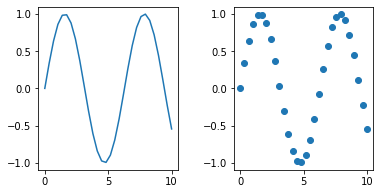

In [2]:
# plot
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

x = np.linspace(0,10,30)

axes[0].plot(x, np.sin(x))
axes[1].scatter(x, np.sin(x))

plt.show()

## K-means clustering

### Toy dataset load

In [3]:
from sklearn.datasets import make_blobs

x, y = make_blobs(
    n_samples=500,
    n_features=4,
    centers=3,
    cluster_std=1.5,
    center_box=(-10.0, 10.0),
    random_state=1,
)  # For reproducibility

print(x.shape, y.shape)

(500, 4) (500,)


In [4]:
print(x[0])

[6.53615122e-01 9.99463742e-05 6.23724489e-01 2.31142359e+00]


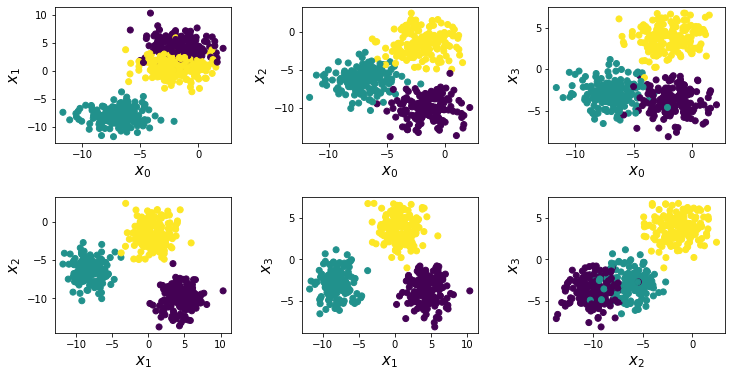

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axes[0,0].scatter(x[:,0], x[:,1] , c=y )
axes[0,1].scatter(x[:,0], x[:,2] , c=y )
axes[0,2].scatter(x[:,0], x[:,3] , c=y )
axes[1,0].scatter(x[:,1], x[:,2] , c=y )
axes[1,1].scatter(x[:,1], x[:,3] , c=y )
axes[1,2].scatter(x[:,2], x[:,3] , c=y )

axes[0,0].set_xlabel('$x_0$', fontsize=15 )
axes[0,0].set_ylabel('$x_1$', fontsize=15 )
axes[0,1].set_xlabel('$x_0$', fontsize=15 )
axes[0,1].set_ylabel('$x_2$', fontsize=15 )
axes[0,2].set_xlabel('$x_0$', fontsize=15 )
axes[0,2].set_ylabel('$x_3$', fontsize=15 )

axes[1,0].set_xlabel('$x_1$', fontsize=15 )
axes[1,0].set_ylabel('$x_2$', fontsize=15 )
axes[1,1].set_xlabel('$x_1$', fontsize=15 )
axes[1,1].set_ylabel('$x_3$', fontsize=15 )
axes[1,2].set_xlabel('$x_2$', fontsize=15 )
axes[1,2].set_ylabel('$x_3$', fontsize=15 )


fig.show()


### Train-test split (NOT necessary)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape, y_train.shape)


(400, 4) (400,)


### K-means clustering apply

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, max_iter=1000)

kmeans.fit(x_train)

KMeans(max_iter=1000, n_clusters=3)

### Validate model

In [8]:
y_pred = kmeans.predict(x_test)

print(y_pred)
print(y_test)


[2 1 2 0 0 2 2 1 1 1 0 2 1 0 2 0 2 1 2 2 0 0 2 2 0 1 1 2 2 0 0 0 0 1 2 2 1
 2 0 0 0 1 1 2 0 1 0 0 0 0 1 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 1 0 1 2 1 0 0
 1 0 1 0 2 2 0 2 2 2 1 2 1 2 1 0 1 1 2 0 2 1 0 2 1 1]
[2 0 2 1 1 2 2 0 0 0 1 2 0 1 2 1 2 0 2 2 1 1 2 2 1 0 0 2 2 1 1 1 1 0 2 2 0
 2 1 1 1 0 0 2 1 0 1 1 1 1 0 2 2 2 2 2 2 2 0 1 0 1 0 1 0 1 0 0 1 0 2 0 1 1
 0 1 0 1 2 2 1 2 2 2 0 2 0 2 0 1 0 0 2 1 2 0 1 2 0 0]


In [9]:
# centeroid confirm
kcenter = kmeans.cluster_centers_


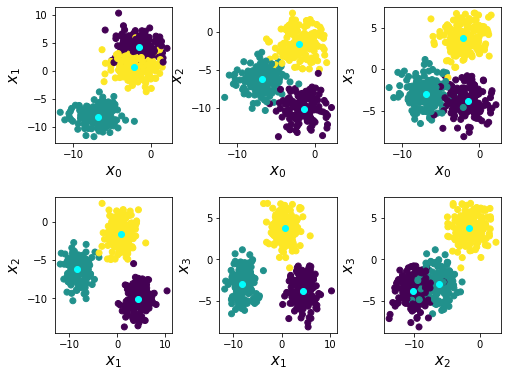

In [10]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axes[0,0].scatter(x[:,0], x[:,1] , c=y )
axes[0,1].scatter(x[:,0], x[:,2] , c=y )
axes[0,2].scatter(x[:,0], x[:,3] , c=y )
axes[1,0].scatter(x[:,1], x[:,2] , c=y )
axes[1,1].scatter(x[:,1], x[:,3] , c=y )
axes[1,2].scatter(x[:,2], x[:,3] , c=y )

axes[0,0].scatter(kcenter[:,0], kcenter[:,1], c='cyan' )
axes[0,1].scatter(kcenter[:,0], kcenter[:,2], c='cyan' )
axes[0,2].scatter(kcenter[:,0], kcenter[:,3], c='cyan' )
axes[1,0].scatter(kcenter[:,1], kcenter[:,2], c='cyan' )
axes[1,1].scatter(kcenter[:,1], kcenter[:,3], c='cyan' )
axes[1,2].scatter(kcenter[:,2], kcenter[:,3], c='cyan' )

axes[0,0].set_xlabel('$x_0$', fontsize=15 )
axes[0,0].set_ylabel('$x_1$', fontsize=15 )
axes[0,1].set_xlabel('$x_0$', fontsize=15 )
axes[0,1].set_ylabel('$x_2$', fontsize=15 )
axes[0,2].set_xlabel('$x_0$', fontsize=15 )
axes[0,2].set_ylabel('$x_3$', fontsize=15 )

axes[1,0].set_xlabel('$x_1$', fontsize=15 )
axes[1,0].set_ylabel('$x_2$', fontsize=15 )
axes[1,1].set_xlabel('$x_1$', fontsize=15 )
axes[1,1].set_ylabel('$x_3$', fontsize=15 )
axes[1,2].set_xlabel('$x_2$', fontsize=15 )
axes[1,2].set_ylabel('$x_3$', fontsize=15 )


fig.show()


### Determining number of clusters

For n_clusters = 2, the average silhouette_score is 0.5120185429400482
For n_clusters = 3, the average silhouette_score is 0.6801913101344051
For n_clusters = 4, the average silhouette_score is 0.5125440395674619
For n_clusters = 5, the average silhouette_score is 0.35789114033776653
For n_clusters = 6, the average silhouette_score is 0.18825165081772213


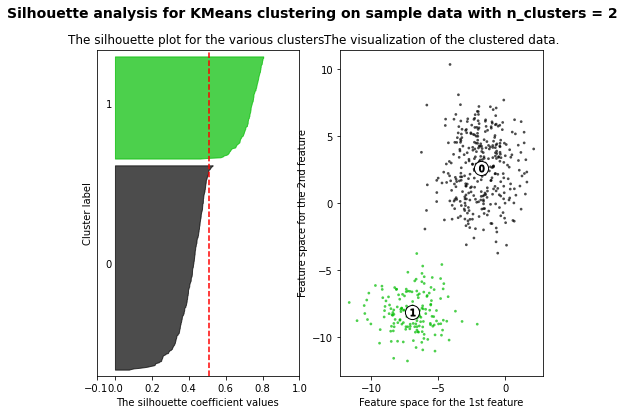

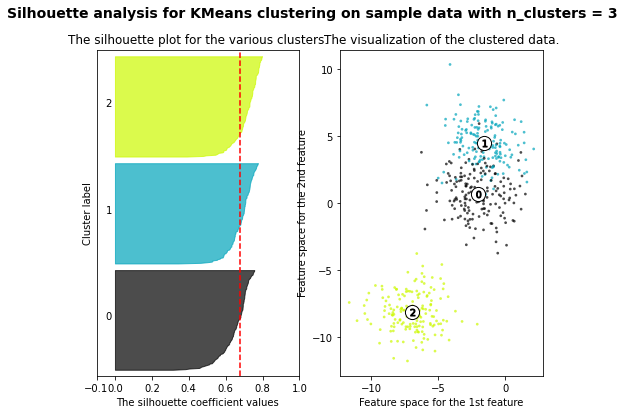

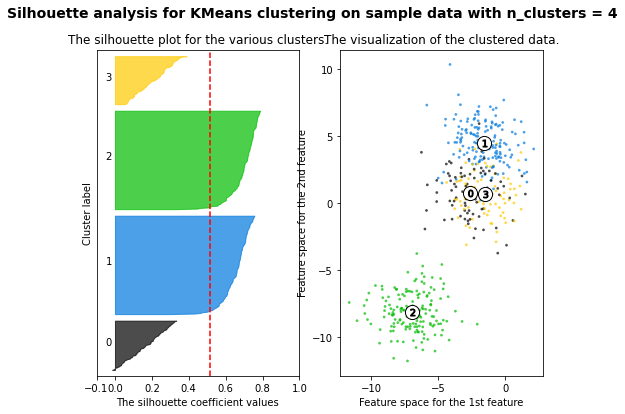

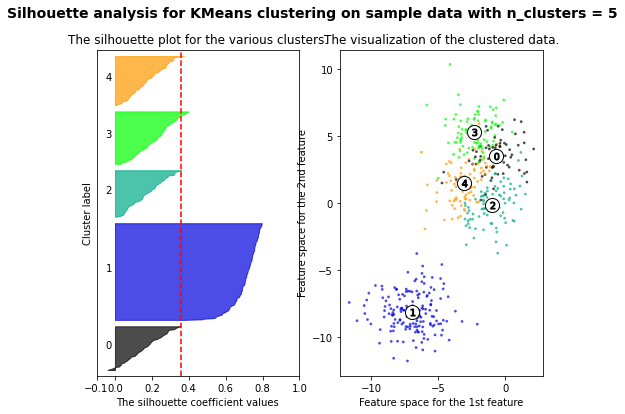

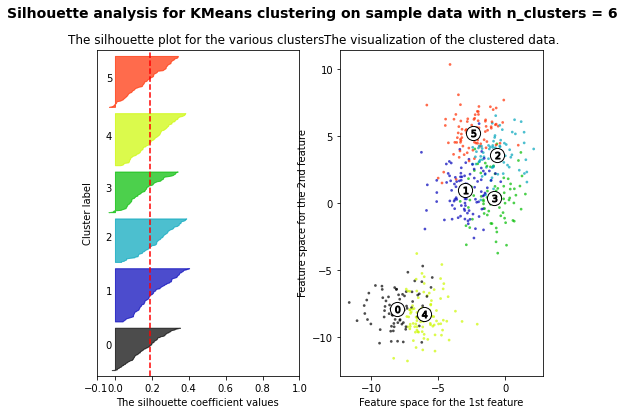

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(x)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters = {nc}, the average silhouette_score is {asv}" \
    .format( nc=n_clusters, asv=silhouette_avg) )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx( np.arange(y_lower, y_upper), 0,
            ith_cluster_silhouette_values,facecolor=color, edgecolor=color,
            alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### hyperparameter tuning 

In [16]:
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler 

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    try:
        score = silhouette_score(X, labels, metric='euclidean')
    except ValueError:
        score = -1
    return score

param_grid = {'n_clusters': [2,3,4,5,6,7]  }

kmeans = KMeans()
cv_cluster = [(slice(None), slice(None))]

gs = GridSearchCV(estimator=kmeans, param_grid=param_grid, \
                  scoring= silhouette_scorer,\
                  cv=cv_cluster, error_score=-1) 
gs = gs.fit(x)

print(gs.best_score_) 
print(gs.best_params_)



0.6801913101344051
{'algorithm': 'full', 'max_iter': 10, 'n_clusters': 3}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to -1.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py", line 1146, in fit
    self._check_params(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py", line 956, in _check_params
    raise ValueError(
ValueError: Algorithm must be 'auto', 'full' or 'elkan', got lloyd instead.

  warn